In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('.\Data\ch_for_cluster.csv')
# df['class'].unique()
df[df['class']=='C000020'].head()

,class,text
250,C000020,家长：我对孩子总是不放心，老是跟孩子唠叨，孩子结果就很烦，听不进去我说的，这种情况该怎么...
251,C000020,\n 中国语文的演变与历史紧密相关。秦并六国，实行书同文，极大地推动了中国语文的发展。辛亥...
252,C000020,\n ①忌陈词老套有些文章开头总是从形势写起，言心称“在××的领导下，在××的支持和关怀下...
253,C000020,人民网北京4月28日讯 记者臧文丽报道：中纪委纠风室副主任施泽华今天在人民网举行的“规范...
254,C000020,&nbsp; \n 一、选专业不要忽略考生的个性特征\n 家长在早期要善于观察和发现孩子...


In [3]:
import jieba
import re

In [4]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\u4e00-\u9fa5]+', ' ', text)
    return text

In [5]:
stopwords_set = []
with open('./stopwords.txt','r',encoding='gb18030') as f:
    for i in f.readlines():
        stopwords_set.append(i.strip())
stopwords_set.extend(['一个','一种','很多','中国','全国','包括','我国','搜狐','搜狗'])
# stopwords_set.extend(['教学','研究','方法','分析','基于','利用','一个','一类','影响','本文','一种','两个','建立','结论','采用','模型','用于','提出',
#                       '我国','学生','大学生','提升','中国'])
len(stopwords_set)

1404

In [6]:
def split_and_filter_words(text):
    global stopwords_set
    words = jieba.cut(text,cut_all=False)
    w_lis = []
    for w in words:
        if w not in stopwords_set and len(w)>1:
            w_lis.append(w)

    return ' '.join(w_lis)

In [7]:
df['preprocess'] = df['text'].apply(preprocess)
df['split_and_filter'] = df['preprocess'].apply(split_and_filter_words)
df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 1.808 seconds.
Prefix dict has been built successfully.


,class,text,preprocess,split_and_filter
0,C000010,新生儿碘缺乏的危害主要是引起先天性甲状腺机能低下症（先甲低）检出率的升高。在碘营养正常的...,新生儿碘缺乏的危害主要是引起先天性甲状腺机能低下症 先甲低 检出率的升高 在碘营养正常的发...,新生儿 缺乏 危害 先天性 甲状腺 机能 低下 先甲低 检出率 升高 营养 发达国家 先甲低...
1,C000010,从今年1月开始审理的创维前董事局主席黄宏生兄弟案将于5月8日划上句号。不管结局如何，创维...,从今年 月开始审理的创维前董事局主席黄宏生兄弟案将于 月 日划上句号 不管结局如何 创维的...,审理 创维 董事局 主席 黄宏生 兄弟 日划 句号 结局 创维 品牌 基业 王殿甫 临危受命...
2,C000010,\n 【搜狐IT左右间】（文/阿祥）自4月28日起，台湾当局向大陆开放“低端半导体封装测试...,搜狐 左右间 文 阿祥 自 月 日起 台湾当局向大陆开放 低端半导体封装测试 与 英寸以下...,左右间 阿祥 日起 台湾当局 大陆 开放 低端 半导体 封装 测试 英寸 面板 中段 制程 ...
3,C000010,为保证通信大通道安全畅通，为客户提供安全、可靠、便捷、优质的通信服务，安徽铁通针对汛期来...,为保证通信大通道安全畅通 为客户提供安全 可靠 便捷 优质的通信服务 安徽铁通针对汛期来临...,保证 通信 大通道 畅通 客户 提供 可靠 便捷 优质 通信 服务 安徽 铁通 针对 汛期 ...
4,C000010,【赛迪网讯】北京时间4月30日消息，全球第一大手机厂商诺基亚近日宣布，该公司将在低端和高...,赛迪网讯 北京时间 月 日消息 全球第一大手机厂商诺基亚近日宣布 该公司将在低端和高端领域...,赛迪网 北京 时间 消息 全球 第一 手机 厂商 诺基亚 近日 公司 低端 高端 领域 全线...


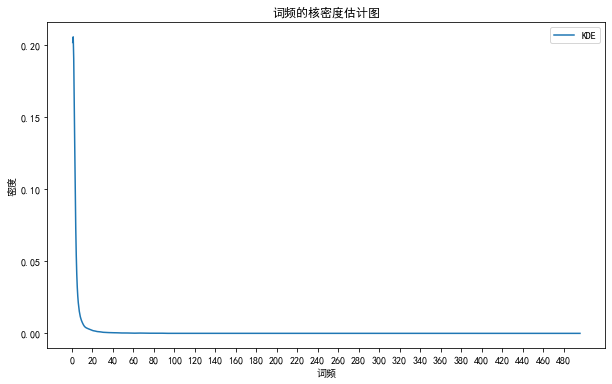

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 转换文本数据
count_vec = vectorizer.fit_transform(df['split_and_filter'])
count_vec = count_vec.toarray()

# 计算每个单词的出现次数
word_counts = count_vec.sum(axis=0)

x = np.linspace(min(word_counts), max(word_counts), 1000)

# 计算核密度估计
kde = gaussian_kde(word_counts)

# 在点集x上评估KDE
kde_values = kde.evaluate(x)

# print(kde_values)
# 绘制KDE曲线
plt.figure(figsize=(10, 6))
plt.plot(x, kde_values, label='KDE')
plt.xticks(np.arange(0, max(x)+1, 20))

# 添加标题和轴标签
plt.title('词频的核密度估计图')
plt.xlabel('词频')
plt.ylabel('密度')

# 显示图例
plt.legend()

plt.savefig('./Pic/ch_wc/Frequency.png')
# 显示图形
plt.show()


In [29]:
count_vec.shape,(word_counts>4).sum()

((300, 25218), 4037)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df=3)

# 转换文本数据
count_vec = vectorizer.fit_transform(df['split_and_filter'])
count_vec = count_vec.toarray()
count_vec.shape

(300, 4644)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=3)

# 转换文本数据
tfidf_vec = vectorizer.fit_transform(df['split_and_filter'])
tfidf_vec = tfidf_vec.toarray()
tfidf_vec.shape

(300, 4644)

In [11]:
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.manifold import TSNE
from Bio.Cluster import kcluster
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
import pandas as pd
from scipy.optimize import linear_sum_assignment

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 18

def plot_change(s1,inp):
    plt.figure(figsize=(12,9))
    plt.plot(range(len(s1)),s1,'b')
    plt.xlabel('奇异值数量')
    plt.ylabel('奇异值大小')
    plt.title('奇异值变化图')
    # plt.xticks(np.arange(0,301,30))
    if inp == 'ch':
        plt.savefig('./Pic/ch_wc/Svd_plot.png')
    else:
        plt.savefig('./Pic/docs_wc/Svd_plot.png')

def plot_total_change(s1,inp):
    ss = np.cumsum(s1/np.sum(s1))
    plt.figure(figsize=(12,9))
    plt.plot(range(len(ss)),ss,'b')
    plt.xlabel('奇异值数量')
    plt.ylabel('部分奇异值和解释率')
    plt.title('部分奇异值和解释率变化图')
    # plt.xticks(np.arange(0,301,30))
    if inp == 'ch':
        plt.savefig('./Pic/ch_wc/Svd_total_plot.png')
    else:
        plt.savefig('./Pic/docs_wc/Svd_total_plot.png')

def latent_space(u,s,vh,k):
    # un = u[:,:k]
    s = s[:k]
    sn = np.diag(s)
    vhn = vh[:k,:]
    return np.dot(sn,vhn)

def transform_x(X):
    column_norms = np.linalg.norm(X, axis=0)
    column_norms[column_norms == 0] = 1
    Xn = X / column_norms
    Xn = Xn.transpose()
    return Xn

def clustering_kmeans(X):
    st = time.time()
    # kmeans = KMeans(n_clusters=6,init='k-means++',n_init=1000)  # 设置聚类中心的数量为6
    # kmeans.fit(Xn)
    # labels = kmeans.labels_
    clusterid, error, nfound = kcluster(X, 6, dist='u', npass=1000)
    et = time.time()
    t = et-st

    return clusterid,t

def clustering_gmm(X):
    st = time.time()
    gmm = GaussianMixture(n_components=6, random_state=0,n_init=100,max_iter=1000)
    gmm.fit(X)
    labels = gmm.predict(X)
    et = time.time()
    t = et-st

    return labels,t

def plot_cluster(X,labels,inp):
    num = X.shape[1]
    tsne = TSNE(n_components=2)
    decomposition_data = tsne.fit_transform(X)
    
    x = []
    y = []
    
    for i in decomposition_data:
        x.append(i[0])
        y.append(i[1])
    
    plt.figure(figsize=(12, 9))
    plt.axes()
    plt.scatter(x, y, c=labels, marker="o")
    plt.xticks(())
    plt.yticks(())
    if inp == 'ch':
        plt.savefig(f'./Pic/ch_wc/cluster_plot_{num}.png')
    else:
        plt.savefig(f'./Pic/docs_wc/cluster_plot_{num}.png')
    # plt.show()

def compute_purity(y_true,label):
    num = len(y_true)
    clusters = np.unique(label)
    cc = []
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        # print(true_value)
        # print(np.bincount(true_value))
        cc.append(np.bincount(true_value).max())
    # print(cc)
    return np.sum(cc)/num

def compute_f_measure_new(y_true,label):
    clusters = np.unique(label)
    c_len = len(clusters)
    cross_mat = np.zeros((c_len,c_len))

    num = len(label)
    label_num = np.bincount(label)
    true_num = np.bincount(y_true)

    i = 0
    for c in clusters:
        idx = np.where(label == c)[0]
        # print(idx)
        true_value = [y_true[i] for i in idx]
        every_num = np.bincount(true_value,minlength=c_len)
        # print(every_num)
        cross_mat[i,:] = every_num
        i+=1
        
    tp = 0
    for i in range(c_len):
        for j in range(c_len):
            if cross_mat[i,j] >= 2:
                tp += cross_mat[i,j]*(cross_mat[i,j]-1)/2

    tp_fp =  np.sum([i*(i-1)/2 for i in label_num])
    fp = tp_fp -tp

    tp_fn = np.sum([i*(i-1)/2 for i in true_num])
    fn = tp_fn - tp

    all_4 = num*(num-1)/2

    tn = all_4 - tp - fp - fn
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = 2*precision*recall/(precision+recall)
    ari = 2*(tp*tn-fn*fp)/((tp+fn)*(fn+tn)+(tp+fp)*(fp+tn))
    return f,ari

 
def max_acc(y_true, y_pred):
    y_true = y_true.astype(np.int64) 
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)

    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
 
    # print(w.max() - w)
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    
    return sum([w[i, j] for i, j in zip(row_ind, col_ind)]) * 1.0 / y_pred.size

kmeans_t = []

purity, fl, aril, acc = [],[],[],[]

inp = 'docs'
path = './Mat/{}'.format(inp)+'_tfidf.npy'
df = pd.read_csv(f'./Data/{inp}_prepared.csv')
dic = {'O1':0,'C8':1,'P1':2,'R3':3,'F7':4,'G8':5}
df['type'] = [dic[i] for i in df['class']]
y_true = df['type'].tolist()
y_true=np.array(y_true)

i = tfidf_vec
# i = transform_x(i)
# info_list.append(s_list[i.shape[1]-1])
label,t = clustering_kmeans(i)
kmeans_t.append(t)
purity.append(compute_purity(y_true,label))
f,ari = compute_f_measure_new(y_true,label)
fl.append(f)
aril.append(ari)

In [12]:
new_df = pd.DataFrame({
                        't':kmeans_t,
                        'purity':purity,
                        'f_list':fl,
                        'ari_list':aril})
new_df

,t,purity,f_list,ari_list
0,625.970619,0.656667,0.463666,0.358101


dict_keys(['公司', '创维', '市场', '手机', '分类', '用户', '信息', '服务', '技术', '微软', '提供', '网络', '黄宏生', '产品', '王殿甫', '亿美元', '广告', '发展', '时间', '功能', '网站', '企业', '消息', '业务', '美国', '销售', '改革', '消费者', '部门', '全球', '支持', '号段', '记者', '核算', '推出', '收支', '方式', '康宁', '政府', '厂商', '行业', '电信', '服务器', '科技', '创新', '工作', '台湾', '潘鹏凯', '静电', '国内', '万美元', '英特尔', '分析师', '平台', '去年', '管理', '通信', '运营商', '利润', '软件', '产业', '发布', '行政', '投资', '设计', '北京', '设备', '收入', '每股', '玻璃', '搜索', '聚君', '来说', '资金', '竞争', '生产', '苏宁', '显示', '未来', '合作', '开发', '第三', '增长', '上海', '数据', '基板', '英语', '模式', '信息网', '优势', '战略', '相关', '客户', '第一季度', '芯片', '亏损', '互联网', '智能手机', '语音', '用友'])


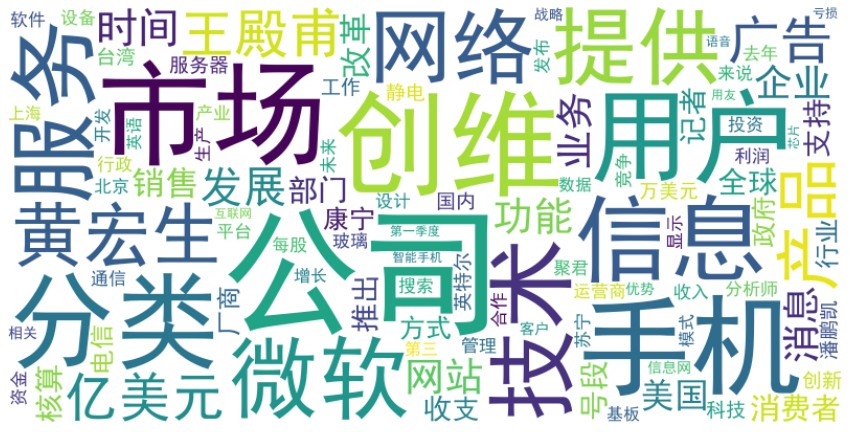

dict_keys(['医院', '检查', '医生', '患者', '治疗', '药品', '医疗', '疾病', '医药', '产品', '健康', '女性', '精子', '研究', '记者', '傣药', '注射', '专家', '市场', '感染', '工作', '消费者', '高血压', '企业', '认证', '发现', '癌症', '咽喉', '发展', '发生', '宫颈', '单通', '选择', '品牌', '症状', '药材', '国家', '卫生部', '口腔', '费用', '增加', '人员', '生产', '肾积水', '情况', '男人', '控制', '政府', '公司', '预防', '病人', '项目', '临床', '常见', '身体', '技术', '提高', '表现', '导致', '作用', '服务', '肿瘤', '通用', '质量', '时间', '病情', '诊断', '检验', '全科', '药物', '看病', '食物', '手术', '原因', '社区', '目的', '相关', '销售', '影响', '不少', '收入', '广告', '水牛', '解决', '教授', '药业', '方法', '中心', '减少', '人体', '因素', '生活', '护理液', '管理', '调查', '价格', '特别', '报告', '白带', '阴道'])


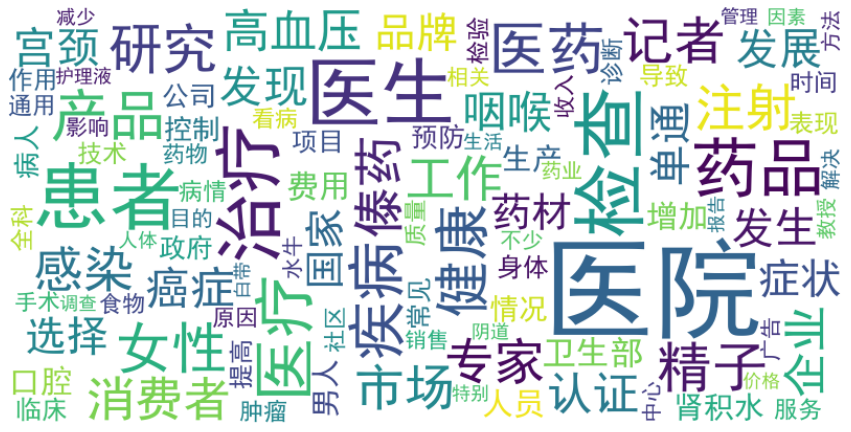

dict_keys(['直播员', '比赛', '上半场', '国安队', '纳什', '下半场', '第二节', '跳投', '篮板', '球员', '科比', '对手', '防守', '重庆队', '比分', '犯规', '队员', '对方', '第一节', '进攻', '机会', '主场', '任意球', '得分', '俱乐部', '球队', '北京', '冠军', '参加', '将球', '破坏', '联赛', '助攻', '禁区', '球迷', '热队', '太阳队', '中国队', '网队', '再次', '选手', '失误', '上篮', '表现', '记者', '领先', '命中', '时间', '分钟', '训练', '三分', '决赛', '门将', '突破', '中场', '北京国安队', '迪奥', '最终', '体育', '太阳', '组织', '马里昂', '状态', '结束', '排名', '反击', '进球', '布朗', '公开赛', '青岛', '替下', '巴博萨', '张宁', '健身', '快速', '阎相闯', '谢杏芳', '实力', '绿城', '前场', '得球', '主将', '夺得', '一场', '击败', '发挥', '世界', '优势', '阵容', '本场', '情况', '新华社', '拿下', '打出', '蔡赟', '付海峰', '休息', '黄牌', '开出', '战胜'])


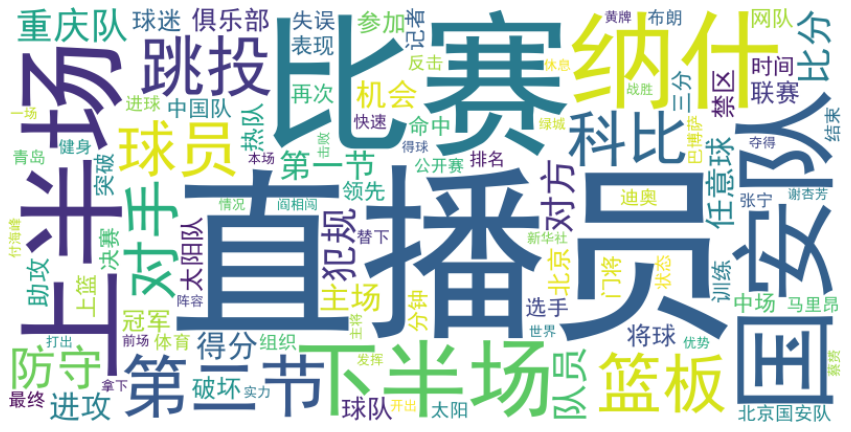

dict_keys(['小白', '珍妃', '女书', '社会', '美国', '住房', '贷款', '生活', '文化', '日本', '一页', '发展', '历史', '北京', '国家', '女人', '民族', '毛泽东', '人口', '世界', '华国锋', '两个', '父亲', '作品', '皇帝', '光绪', '慈禧', '发现', '大黑', '太后', '经济', '晓军', '王总', '情况', '传统', '台湾', '军事', '斯大林', '波伏瓦', '家庭', '女性', '工作', '时间', '欧大哥', '住宅', '标准', '城市', '提出', '思想', '文字', '保护', '警察', '小倩', '小说', '西方', '方式', '研究', '王珍如', '发生', '老毒', '部队', '说法', '分钱', '刘裕', '自由', '作者', '事情', '萨特', '国内', '人民', '提供', '南朝鲜', '人类', '每斤', '设定', '这一', '现象', '几个', '记者', '朝鲜', '二奶', '林场', '男人', '主席', '读者', '战争', '年代', '官员', '拥有', '利益', '解决', '只能', '自然', '正是', '知青', '作战', '志愿军', '一位', '整容', '莲花'])


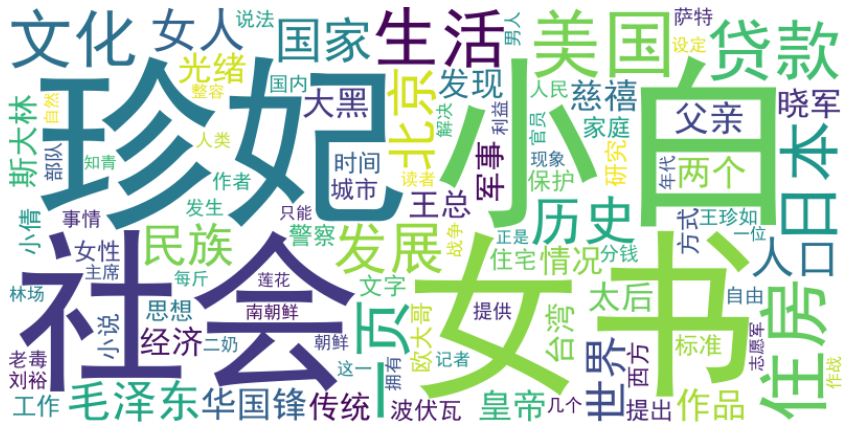

dict_keys(['工作', '企业', '公司', '员工', '公务员', '招聘', '工资', '生活', '老板', '简历', '找到', '人才', '职业', '策划', '时间', '女性', '北京', '相关', '就业', '加薪', '路芷佩', '网页', '毕业生', '客户', '情况', '面试', '选择', '人员', '专场', '机会', '网络', '求职', '职位', '能力', '专业', '发展', '孩子', '喜欢', '调查', '一页', '薪水', '收入', '研究生', '家长', '影响', '调整', '上海', '美国', '领导', '硕士', '大学', '同事', '校园', '信息', '希望', '跳槽', '毕业', '一份', '国家', '事情', '压力', '告诉', '心理', '销售', '关系', '提高', '经验', '大学生', '编辑', '学生', '享受', '单位', '奖励', '市场', '办公室', '社会', '学校', '白领', '同学', '回答', '空姐', '岗位', '培养', '原因', '方式', '应聘', '提出', '目标', '感觉', '搜索', '招聘会', '参加', '成功', '发现', '代表', '别人', '穿着', '特别', '师母', '实习'])


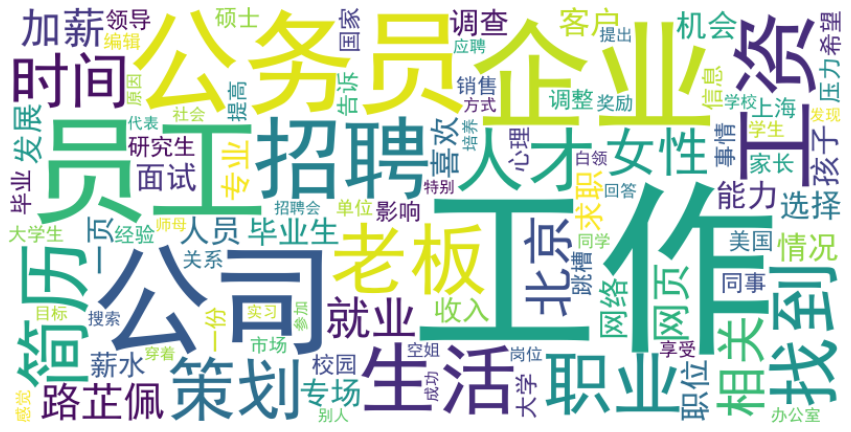

dict_keys(['发展', '学生', '学校', '孩子', '经济', '教育', '建设', '专业', '考生', '招生', '社会', '工作', '东北', '东北地区', '学习', '考试', '国家', '绿色', '就业', '材料', '环境', '哈工大', '家长', '政策', '能力', '重点', '农村', '老师', '资源', '产业', '生态环境', '大学', '提高', '影响', '生态', '城市', '情况', '网络', '历史', '教师', '建立', '英语', '录取', '原因', '志愿', '成绩', '关系', '时间', '生活', '政府', '方式', '基地', '正确', '报考', '工业', '计划', '调整', '阅读', '高校', '毕业生', '思想', '文章', '分析', '开发', '海洋', '人口', '参加', '人民', '高考', '实行', '同学', '研究', '治理', '知识', '科学', '工程', '国际', '世纪', '水资源', '二氧化碳', '政治', '基础', '提出', '信息', '主持人', '地区', '变化', '来源', '配置', '协调', '父母', '路由器', '慕永国', '北京', '记者', '现象', '农业', '作用', '标准', '过程'])


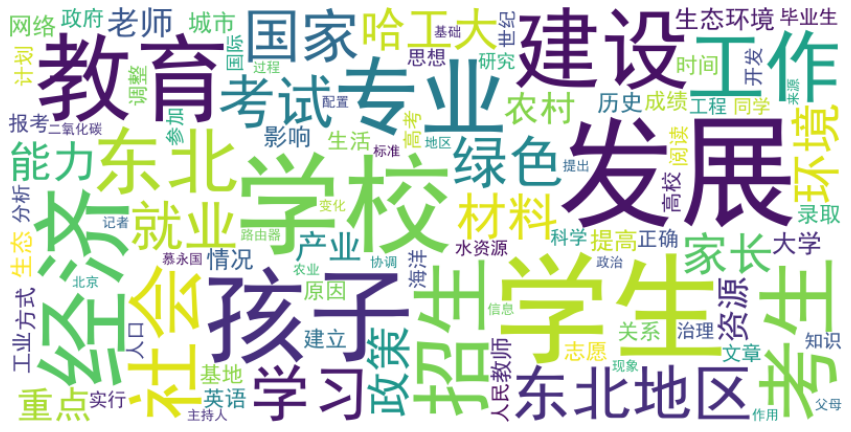

In [33]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

search_words = df['class'].unique().tolist()
# w = 'O1'
dff = pd.DataFrame()
for w in search_words:
    df_new = df[df['class']==w]
    s_list = (' '.join(df_new['split_and_filter'].tolist())).split()
    word_counts = Counter(s_list)
    wc = word_counts.most_common(100)
    print(dict(wc).keys())
    words_wc = dict(wc).keys()
    dff[w] = words_wc
    dff[w+'_times'] = dict(wc).values()

    # 创建词云对象
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 指定字体，确保支持中文显示
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords_set
    ).generate_from_frequencies(dict(wc))

    # 显示词云图
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 不显示坐标轴
    plt.savefig('./Pic/ch_wc/{}.png'.format(w))
    plt.show()
dff.head()
dff.to_csv('./Data/ch_fre_top100_new.csv',index=False)

In [34]:
df.to_csv('./Data/ch_prepared.csv',index=False)

In [35]:
count_vec = count_vec.transpose()
tfidf_vec = tfidf_vec.transpose()
count_vec.shape,tfidf_vec.shape

((4644, 300), (4644, 300))

In [36]:
import numpy as np
np.save('./Mat/ch_count.npy',count_vec)
np.save('./Mat/ch_tfidf.npy',tfidf_vec)

In [15]:
import time
import numpy as np
count_vec = np.load('./Mat/ch_count.npy')
st = time.time()

def rsvd(A,k,n_iter=5):
    Omega = np.random.randn(A.shape[1],k)
    Y = A@Omega
    for q in range(n_iter):
        Y = A @ (A.T @ Y)
    Q,_ = np.linalg.qr(Y)

    B = Q.T @ A
    u_tilde, s, v = np.linalg.svd(B, full_matrices = 0)
    u = Q @ u_tilde

    s = np.diag(s)
    res = np.dot(s,v)
    return res

res = rsvd(count_vec,280)

et = time.time()
print(et-st)

1.0672433376312256


In [43]:
from sklearn.decomposition import PCA
import pandas as pd
from Bio.Cluster import kcluster

def compute_purity(y_true,label):
    num = len(y_true)
    clusters = np.unique(label)
    cc = []
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        # print(true_value)
        # print(np.bincount(true_value))
        cc.append(np.bincount(true_value).max())
    # print(cc)
    return np.sum(cc)/num

def clustering_kmeans(X):
    st = time.time()
    # kmeans = KMeans(n_clusters=6,init='k-means++',n_init=1000)  # 设置聚类中心的数量为6
    # kmeans.fit(Xn)
    # labels = kmeans.labels_
    clusterid, error, nfound = kcluster(X, 6, dist='u', npass=1000)
    et = time.time()
    t = et-st

    return clusterid,t

inp = 'ch'
df = pd.read_csv(f'./Data/{inp}_prepared.csv')
dic = {'C000010':0,
    'C000013':1,
    'C000014':2,
    'C000020':3,
    'C000022':4,
    'C000023':5}
df['type'] = [dic[i] for i in df['class']]
y_true = df['type'].tolist()
y_true=np.array(y_true)

pca = PCA(n_components=280)

X_pca = pca.fit_transform(count_vec.T)

# r = pca.explained_variance_ratio_

label,t = clustering_kmeans(X_pca)
compute_purity(y_true,label)

0.5

In [44]:
X_pca.shape

(300, 280)

In [39]:
r

array([0.16662543, 0.05205181, 0.04734714, 0.04265369, 0.0341228 ,
       0.03194672, 0.03023408, 0.02127338, 0.02025329, 0.01886865,
       0.01573133, 0.01488918, 0.01438685, 0.01283006, 0.01208104,
       0.01157049, 0.01096567, 0.01078736, 0.00937047, 0.00919253,
       0.00893074, 0.00820657, 0.00806832, 0.00757119, 0.00697129,
       0.00688307, 0.00644444, 0.0062417 , 0.0061427 , 0.00580104])

In [4]:
import time
import numpy as np
count_vec = np.load('./Mat/ch_count.npy')
st = time.time()
u, s, vh = np.linalg.svd(count_vec, full_matrices=True)
et = time.time()
print(et-st)

6.6391260623931885


In [24]:
import time
tfidf_vec = np.load('./Mat/ch_tfidf.npy')
st1 = time.time()
u1, s1, vh1 = np.linalg.svd(tfidf_vec, full_matrices=True)
et1 = time.time()
print(et1-st1)

6.563998699188232


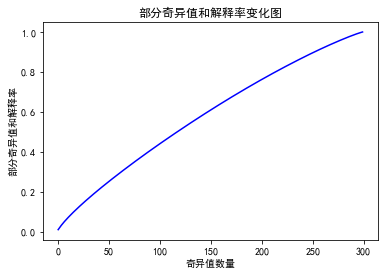

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
ss = np.cumsum(s1/np.sum(s1))
plt.plot(range(len(ss)),ss,'b')
plt.xlabel('奇异值数量')
plt.ylabel('部分奇异值和解释率')
plt.title('部分奇异值和解释率变化图')
# plt.xticks(np.arange(0,301,30))
plt.savefig('./Pic/ch_wc/Svd_plot.png')

In [7]:
def latent_space(u,s,vh,k):
    # un = u[:,:k]
    s = s[:k]
    sn = np.diag(s)
    vhn = vh[:k,:]
    return np.dot(sn,vhn)
k_list = np.arange(30,301,30)
# k_list
ls_list1 = []
ls_list2 = []
for k in k_list:
    ls_list1.append(latent_space(u,s,vh,k))
    ls_list2.append(latent_space(u1,s1,vh1,k))

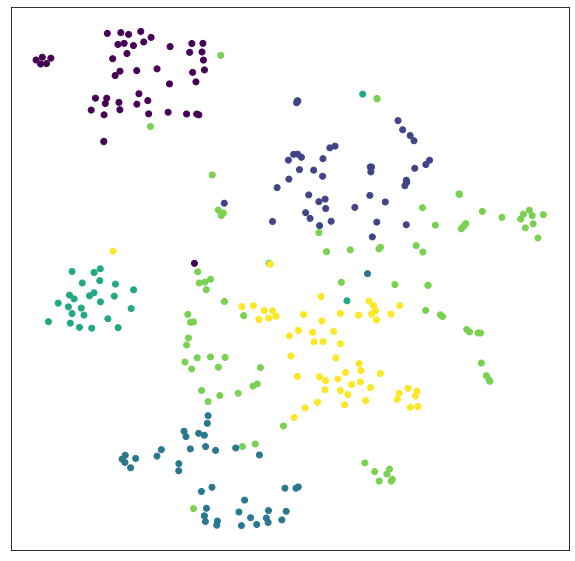

10.066173553466797


In [8]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import cosine_distances
# cosine_distances(ls_list2[-1])

def clustering(X):

    column_norms = np.linalg.norm(X, axis=0)
    column_norms[column_norms == 0] = 1
    Xn = X / column_norms
    Xn = Xn.transpose()

    st = time.time()
    kmeans = KMeans(n_clusters=6,init='k-means++',n_init=1000)  # 设置聚类中心的数量为6
    kmeans.fit(Xn)
    labels = kmeans.labels_
    et = time.time()
    t = et-st

    tsne = TSNE(n_components=2)
    decomposition_data = tsne.fit_transform(Xn)
    
    x = []
    y = []
    
    for i in decomposition_data:
        x.append(i[0])
        y.append(i[1])
    
    plt.figure(figsize=(10, 10))
    plt.axes()
    plt.scatter(x, y, c=labels, marker="o")
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return labels,t
label,t = clustering(ls_list2[0])
print(t)

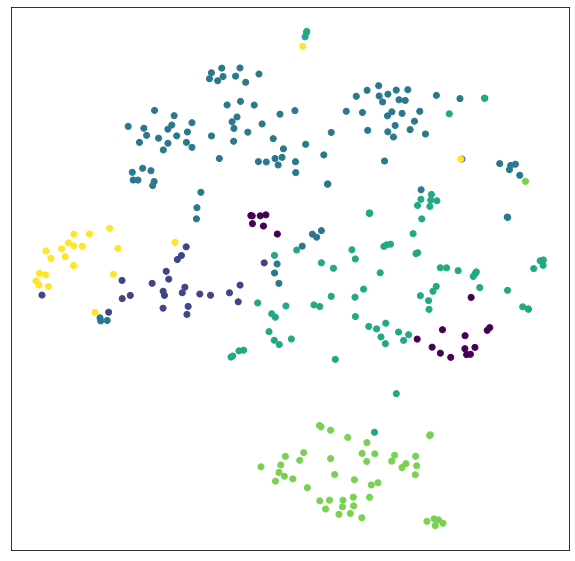

36.843976974487305


In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# from sklearn.metrics.pairwise import cosine_distances
# cosine_distances(ls_list2[-1])

def clustering(X):

    column_norms = np.linalg.norm(X, axis=0)
    column_norms[column_norms == 0] = 1
    Xn = X / column_norms
    Xn = Xn.transpose()

    st = time.time()
    gmm = GaussianMixture(n_components=6, random_state=0,n_init=1000)
    gmm.fit(Xn)
    labels = gmm.predict(Xn)
    et = time.time()
    t = et-st

    tsne = TSNE(n_components=2)
    decomposition_data = tsne.fit_transform(Xn)
    
    x = []
    y = []
    
    for i in decomposition_data:
        x.append(i[0])
        y.append(i[1])
    
    plt.figure(figsize=(10, 10))
    plt.axes()
    plt.scatter(x, y, c=labels, marker="o")
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return labels,t
label,t = clustering(ls_list2[0])
print(t)

In [19]:
import pandas as pd
df = pd.read_csv('./Data/ch_prepared.csv')
dic = {'C000010':0,
       'C000013':1,
       'C000014':2,
       'C000020':3,
       'C000022':4,
       'C000023':5}
df['type'] = [dic[i] for i in df['class']]
y_true = df['type'].tolist()
y_true=np.array(y_true)

def compute_purity(y_true,label):
    num = len(y_true)
    clusters = np.unique(label)
    cc = []
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        # print(true_value)
        # print(np.bincount(true_value))
        cc.append(np.bincount(true_value).max())
    # print(cc)
    return np.sum(cc)/num
compute_purity(y_true,label)

0.5933333333333334

In [47]:
def compute_f_measure(y_true,label):
    cross_mat = np.zeros((6,6))
    precision = np.zeros((6,6))
    recall = np.zeros((6,6))

    num = len(label)
    label_num = np.bincount(label)
    true_num = np.bincount(y_true)

    clusters = np.unique(label)
    i = 0
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        every_num = np.bincount(true_value,minlength=6)
        print(every_num)
        cross_mat[i,:] = every_num
        i+=1

    for i in range(cross_mat.shape[0]):
        precision[i,:] = cross_mat[i,:]/label_num[i]

    for i in range(cross_mat.shape[1]):
        recall[:,i] = cross_mat[:,i]/true_num[i]

    pre = np.sum(np.max(precision,axis=0)*true_num)/num
    rec = np.sum(np.max(recall,axis=0)*true_num)/num
    f_score = 2*pre*rec/(pre+rec)
    return pre,rec,f_score
compute_f_measure(y_true,label)

[40  6  0  5  2  1]
[ 4 32  1  3  1  3]
[ 0  1  0 32  2  0]
[ 6  7  6 10  7 38]
[ 0  0 42  0  0  0]
[ 0  4  1  0 38  8]


(0.7734851225047304, 0.74, 0.7563721402246046)

In [20]:
def compute_f_measure_new(y_true,label):
    clusters = np.unique(label)
    c_len = len(clusters)
    cross_mat = np.zeros((c_len,c_len))
    # precision = np.zeros((6,6))
    # recall = np.zeros((6,6))

    num = len(label)
    label_num = np.bincount(label)
    true_num = np.bincount(y_true)

    
    i = 0
    for c in clusters:
        idx = np.where(label == c)[0]
        # print(idx)
        true_value = [y_true[i] for i in idx]
        every_num = np.bincount(true_value,minlength=c_len)
        print(every_num)
        cross_mat[i,:] = every_num
        i+=1
        
    tp = 0
    for i in range(c_len):
        for j in range(c_len):
            if cross_mat[i,j] >= 2:
                tp += cross_mat[i,j]*(cross_mat[i,j]-1)/2

    tp_fp =  np.sum([i*(i-1)/2 for i in label_num])
    fp = tp_fp -tp

    tp_fn = np.sum([i*(i-1)/2 for i in true_num])
    fn = tp_fn - tp

    all_4 = num*(num-1)/2

    tn = all_4 - tp - fp - fn
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = 2*precision*recall/(precision+recall)
    ari = 2*(tp*tn-fn*fp)/((tp+fn)*(fn+tn)+(tp+fp)*(fp+tn))
    return tp,fp,tn,fn,precision,recall,f,ari
compute_f_measure_new(y_true,label)

[17  1  0  1  1  0]
[ 0  1  0 18  4  1]
[ 3 25  1  7 26 44]
[30 23  0  4 17  5]
[ 0  0 49  0  0  0]
[ 0  0  0 20  2  0]


(4097.0,
 6422.0,
 31078.0,
 3253.0,
 0.38948569255632665,
 0.5574149659863945,
 0.4585595164810566,
 0.32911739393302686)

In [36]:
import numpy as np
from scipy.optimize import linear_sum_assignment
 
def acc(y_true, y_pred):
    y_true = y_true.astype(np.int64) 
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    print(w)
    print("---------初始化----------")
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
 
    print(w)
    print("-----------赋值结束--------")
    print(w.max() - w)
    row_ind, col_ind = linear_sum_assignment(w.max() - w)
    print("--------线性求和分配-----------")
    print(row_ind, col_ind)
    
    return sum([w[i, j] for i, j in zip(row_ind, col_ind)]) * 1.0 / y_pred.size
 
 
acc(y_true,label)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
---------初始化----------
[[17  1  0  1  1  0]
 [ 0  1  0 18  4  1]
 [ 3 25  1  7 26 44]
 [30 23  0  4 17  5]
 [ 0  0 49  0  0  0]
 [ 0  0  0 20  2  0]]
-----------赋值结束--------
[[32 48 49 48 48 49]
 [49 48 49 31 45 48]
 [46 24 48 42 23  5]
 [19 26 49 45 32 44]
 [49 49  0 49 49 49]
 [49 49 49 29 47 49]]
--------线性求和分配-----------
[0 1 2 3 4 5] [0 4 5 1 2 3]


0.5233333333333333

In [23]:
# -*- coding: utf-8 -*-
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
from Bio.Cluster import kcluster
# from Bio.Cluster import clustercentroids
import matplotlib.pyplot as plt
import numpy as np

# data = np.load('/home/philochan/ResExp/genderkernel/1.npy')
# coef = []
# x = range(3, 20)
# for clusters in x:
X = ls_list2[0]
column_norms = np.linalg.norm(X, axis=0)

# 避免除以零，如果范数为零，则设置为1
column_norms[column_norms == 0] = 1

# 对每一列进行标准化
Xn = X / column_norms
Xn = Xn.transpose()

clusterid, error, nfound = kcluster(Xn, 6, dist='u', npass=1000)
# silhouette_avg = silhouette_score(data, clusterid, metric='cosine')
# coef.append(silhouette_avg)
compute_f_measure_new(y_true,clusterid)

[ 3  3  0  5  7 47]
[ 1  1  1  2 38  0]
[ 0  1  0 40  1  0]
[ 2 29  0  0  1  2]
[ 0  0 49  1  0  0]
[44 16  0  2  3  1]


(5256.0,
 2519.0,
 34981.0,
 2094.0,
 0.6760128617363345,
 0.7151020408163266,
 0.6950082644628099,
 0.6332098100613628)